# =======================================================================================================
# Exercises (Set 1 - 4) START
# =======================================================================================================

##### Use the iris database to answer the following quesitons:

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pydataset import data

In [2]:
iris = sns.load_dataset('iris')

### 1. What does the distribution of petal lengths look like?

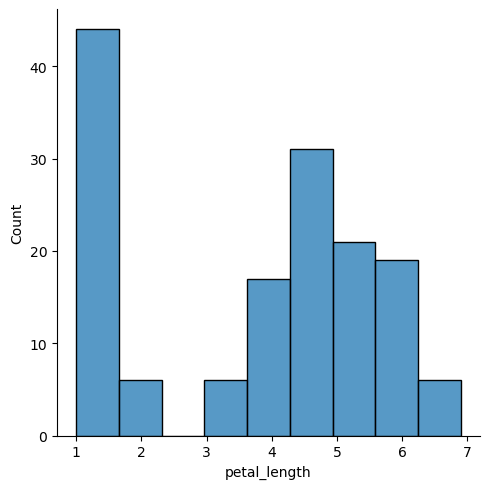

In [3]:
sns.displot(data=iris, x='petal_length');

### 2. Is there a correlation between petal length and petal width? Use http://guessthecorrelation.com/ as a hint to how we could visually determine if a correlation exists between two numeric columns.

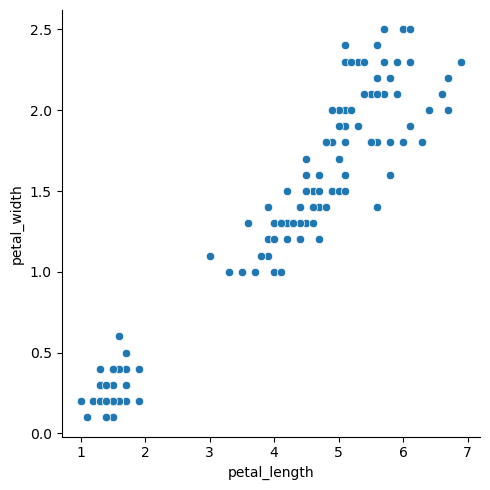

In [4]:
sns.relplot(
data=iris,
x='petal_length',
y='petal_width')
plt.show()

### 3. Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the lense of a categorical column.

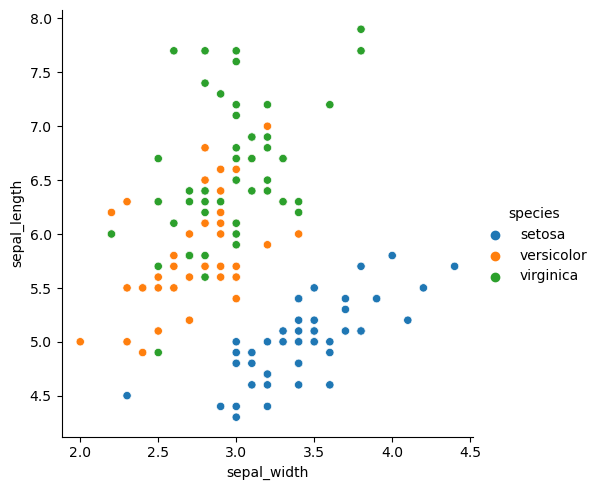

In [6]:
sns.relplot(
data=iris,
x='sepal_width',
y='sepal_length',
hue='species')
plt.show()

### 4. Which features would be best used to predict species?

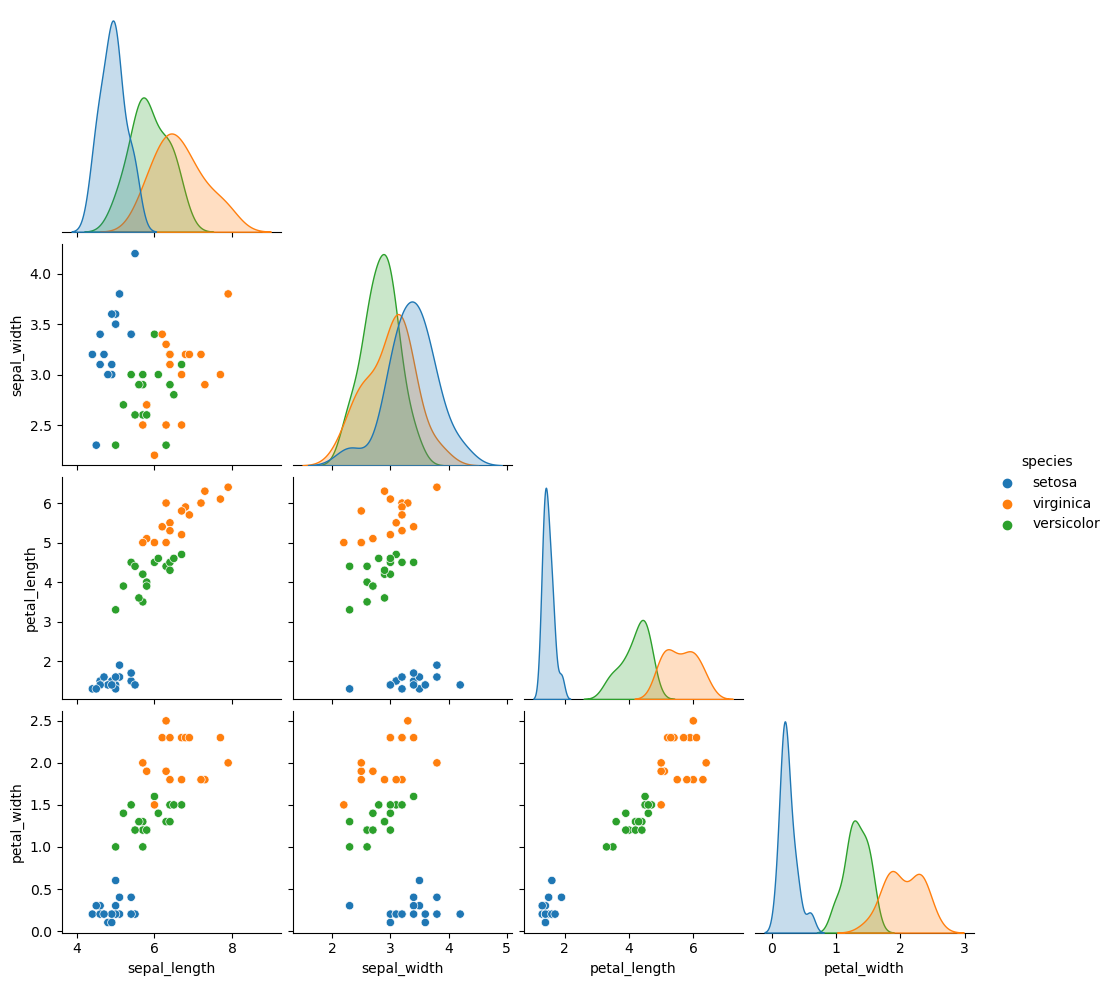

In [14]:
sns.pairplot(
iris.sample(50),
hue='species',
corner=True)
plt.show()

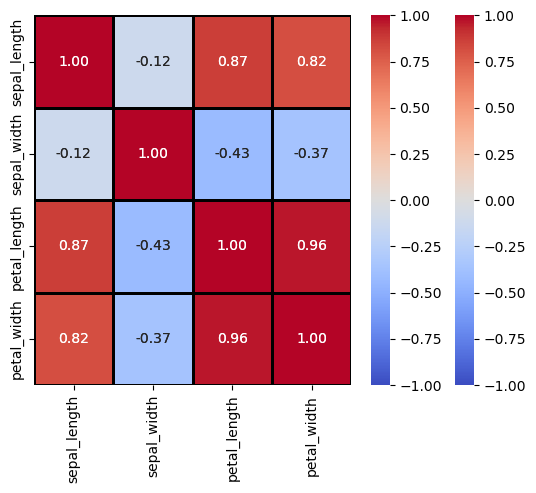

In [10]:
sns.heatmap(
iris.corr(),
annot=True,
cmap='coolwarm',
vmax=1,
vmin=-1,
center=0,
linewidth=1,
linecolor='k',
fmt='.2f')
plt.show()

# =======================================================================================================
# Exercises (Set 1 - 4) END
# Exercises (Set 1 - 4) TO Exercises (Set 2 - 5)
# Exercises (Set 2 - 5) START
# =======================================================================================================

### 1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?
### Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

In [15]:
anscombe = sns.load_dataset('anscombe')

In [26]:
anscombe_groupdataset = anscombe.groupby('dataset').describe()

In [27]:
anscombe_groupdataset

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

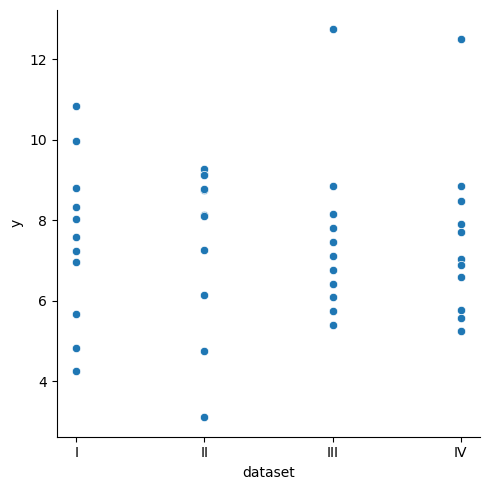

In [33]:
sns.relplot(
data=anscombe,
x='dataset',
y='y')
plt.show()

### 2. Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

In [36]:
insctspry = data('InsectSprays')

In [37]:
insctspry.sample()

,count,spray
64,22,F


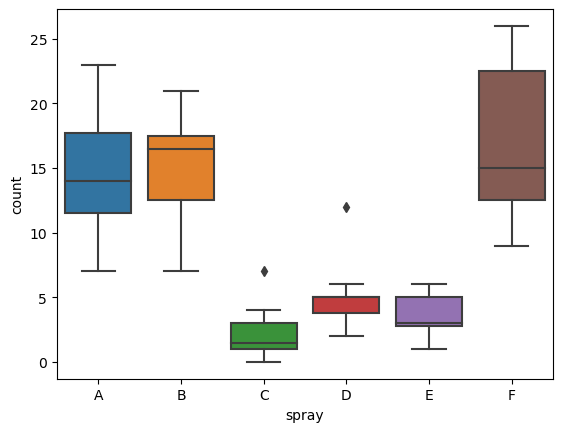

In [38]:
sns.boxplot(
data=insctspry,
x='spray',
y='count')
plt.show()

### 3. Load the swiss dataset and read it's documentation. The swiss dataset is available from pydatset rather than seaborn. Create visualizations to answer the following questions:

In [40]:
swiss = data('swiss')
swiss.sample()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Veveyse,87.1,64.5,14,6,98.61,24.5


##### 3a. Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)

In [48]:
is_catholic = swiss.Catholic >= 80

##### 3b. Does whether or not a province is Catholic influence fertility?

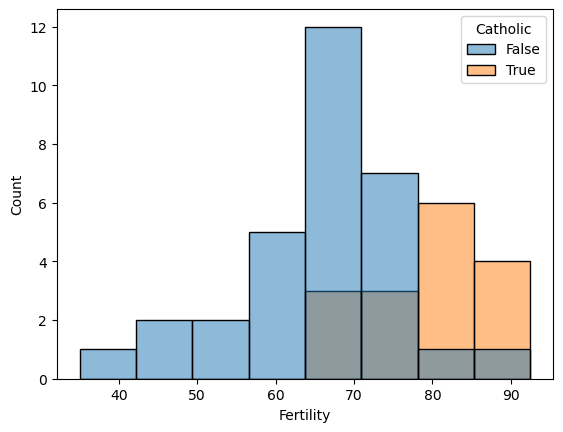

In [56]:
sns.histplot(
data=swiss,
x='Fertility',
hue=is_catholic)
plt.show()

##### 3c. What measure correlates most strongly with fertility?

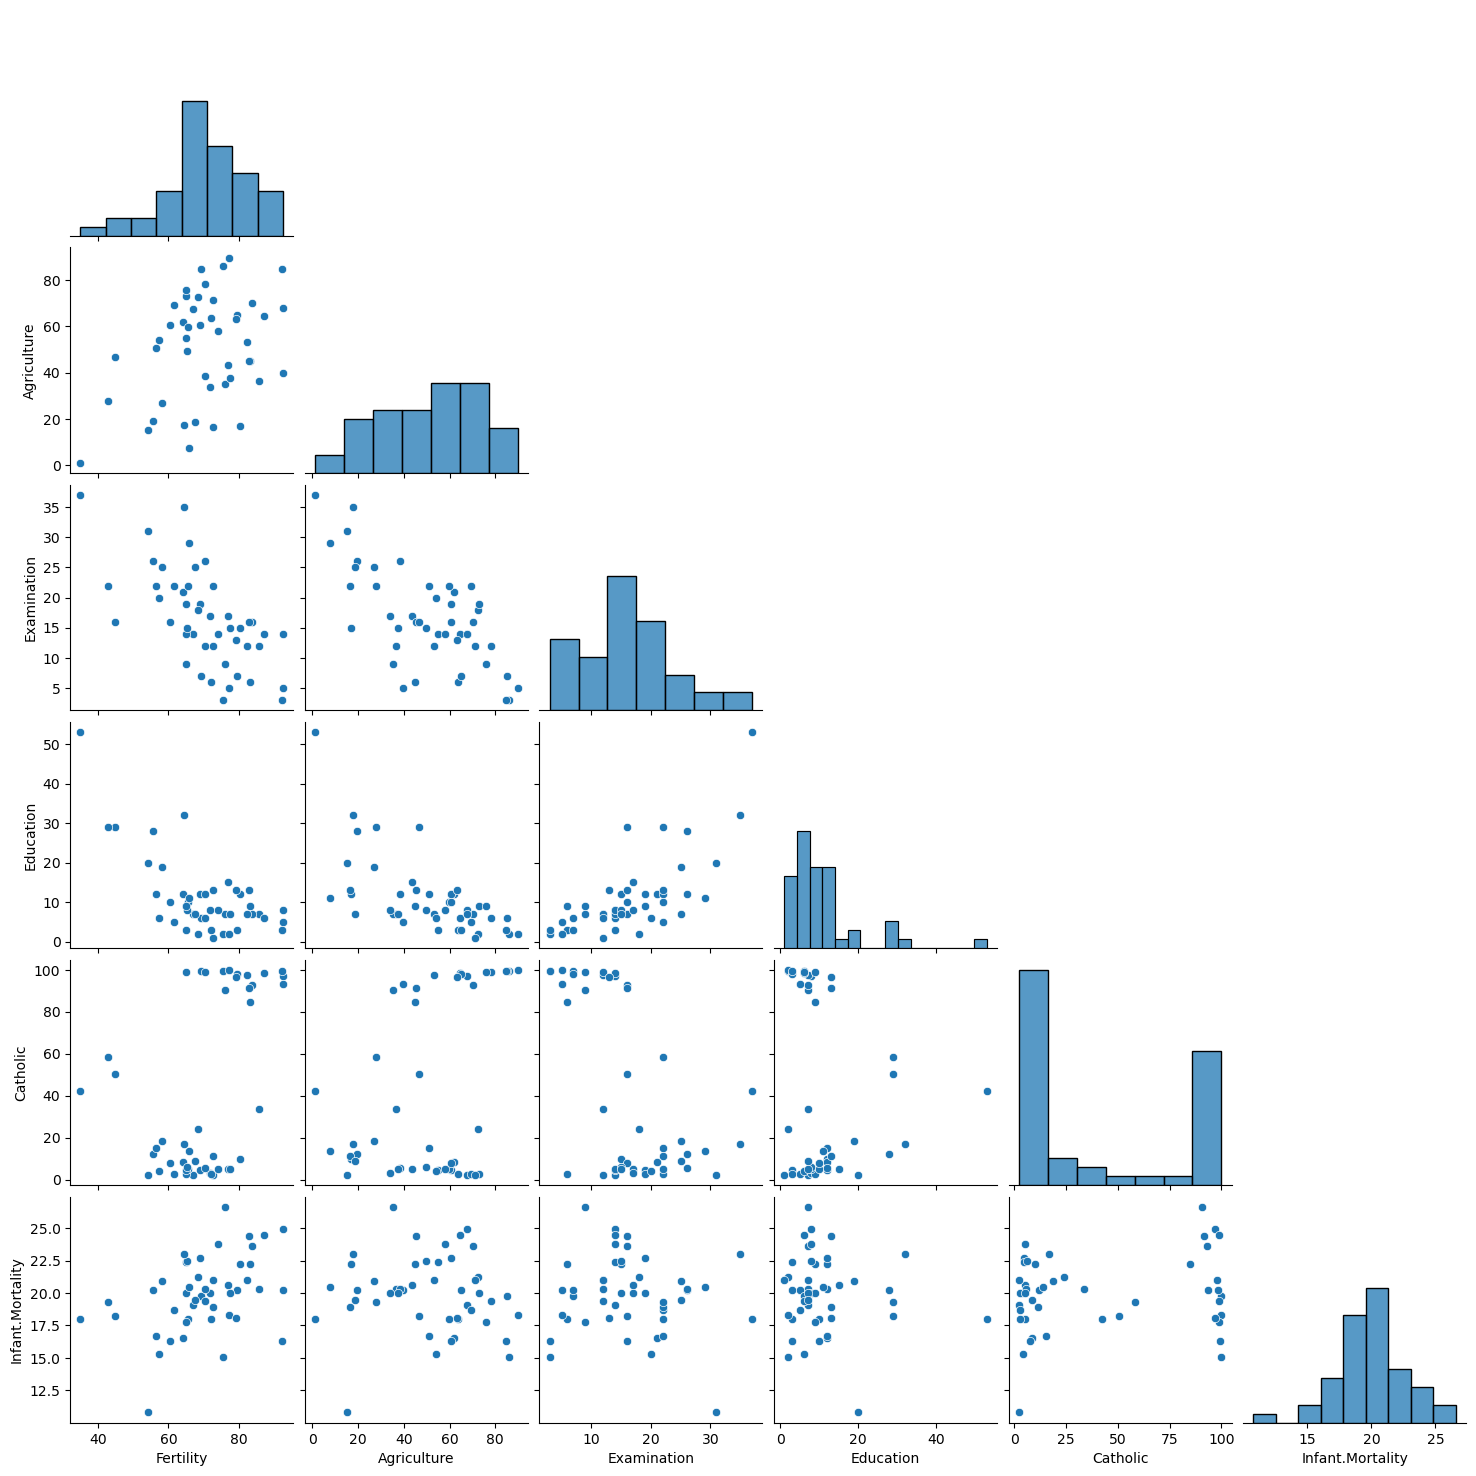

In [58]:
sns.pairplot(
swiss,
corner=True)
plt.show()

In [59]:
swiss.corr()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Fertility,1.000000,0.353079,-0.645883,-0.663789,0.463685,0.416556
Agriculture,0.353079,1.000000,-0.686542,-0.639523,0.401095,-0.060859
Examination,-0.645883,-0.686542,1.000000,0.698415,-0.572742,-0.114022
Education,-0.663789,-0.639523,0.698415,1.000000,-0.153859,-0.099322
Catholic,0.463685,0.401095,-0.572742,-0.153859,1.000000,0.175496
Infant.Mortality,0.416556,-0.060859,-0.114022,-0.099322,0.175496,1.000000


### 4. Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [63]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

In [65]:
chipo = pd.read_csv(url, sep='\t')

In [66]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [86]:
top5 = chipo.item_name.value_counts().head(5)

In [91]:
chipo[chipo.item_name.isin(top5.index)]

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]",$10.98
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables, Black Beans, Pinto Beans, Cheese, Sour...",$11.75
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto Beans, Cheese, Sour Cream, Lettuce]]",$9.25
10,5,1,Chips and Guacamole,NaN,$4.45
...,...,...,...,...,...
4609,1829,1,Canned Soft Drink,[Sprite],$1.25
4610,1830,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4616,1832,1,Chips and Guacamole,NaN,$4.45
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75


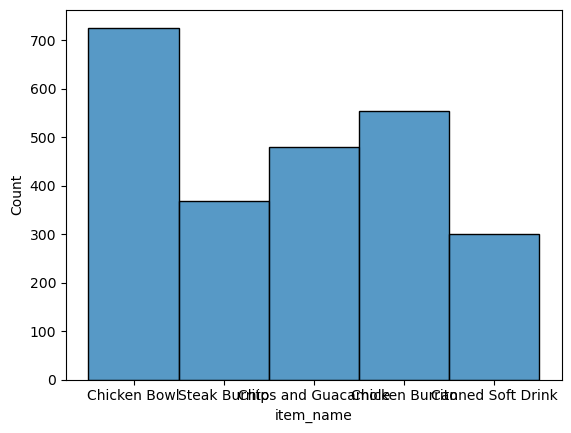

In [93]:
sns.histplot(
data=chipo[chipo.item_name.isin(top5.index)],
x='item_name'
)
plt.show()

### 5. Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [98]:
slpstdy = data('sleepstudy')
slpstdy.sample()

,Reaction,Days,Subject
133,326.8785,2,352


In [112]:
avgreaction = slpstdy.groupby('Days')['Reaction'].mean()

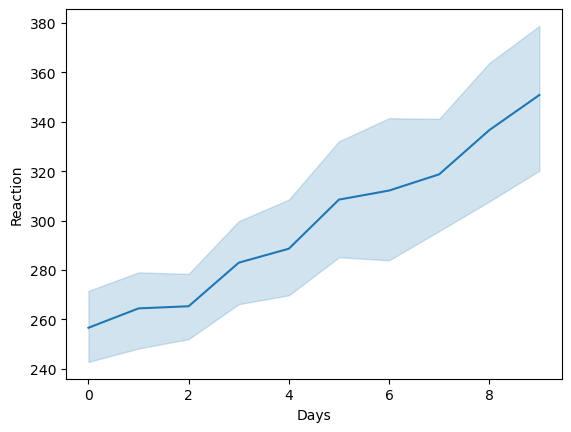

In [121]:
sns.lineplot(
data=slpstdy,
x='Days',
y='Reaction')
plt.show()

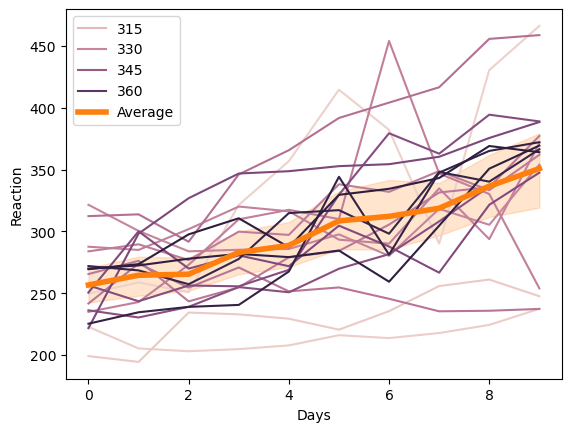

In [134]:
sns.lineplot(
data=slpstdy,
x='Days',
y='Reaction',
hue='Subject')
sns.lineplot(
data=slpstdy,
x='Days',
y='Reaction',
linewidth=4,
label='Average')
plt.legend()
plt.show()

# =======================================================================================================
# Exercises (Set 2 - 5) END
# =======================================================================================================